In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [2]:
class MyRandom():
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
            
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt(Npoints)* np.abs(  np.mean(array**moment) - 1./(1.+moment) )

In [3]:
rand = MyRandom(seed = 6625, method='drand48')

In [4]:
print(rand.Random())

0.5934763381181654


In [5]:
def FillPoints(seed_, method_, Npoints):
    
    rand = MyRandom(seed = seed_, method = method_)
    
    points = np.zeros(Npoints)
    
    for i in tqdm(range(Npoints)):
        points[i] = rand.Random()
        
    return points

In [6]:
Npoints = 5000
Nsimple = FillPoints(165, 'simple', Npoints)
Nrand48 = FillPoints(695, 'drand48', Npoints)

100%|██████████| 5000/5000 [00:00<00:00, 1362937.54it/s]


In [7]:
print(len(Nsimple),len(Nrand48))

5000 5000


In [8]:
indices = np.arange(Npoints)
Even = (indices%2) == 0

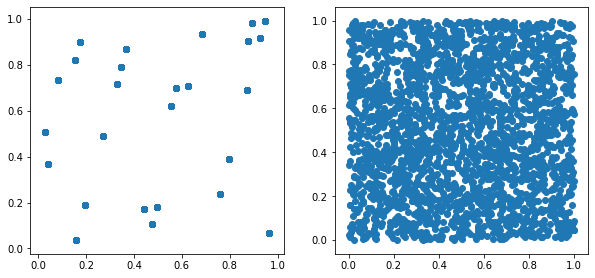

In [9]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.scatter(Nsimple[Even],Nsimple[~Even])
ax2.scatter(Nrand48[Even],Nrand48[~Even])

# Calcular los momentos de la distribucion

In [10]:
rand1 = MyRandom(seed = 16, method='simple')
rand2 = MyRandom(seed = 96, method='drand48')


Points = np.logspace(2,6,5)
print(Points)

[1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


In [11]:
NMoments = 10

Moments1 = []
Moments2 = []

for k in tqdm(range(NMoments)):
    
    test1 = []
    test2 = []
    
    for i in range(len(Points)):
        test1.append(rand1.TestMethod(int(Points[i]),k+1,16,'simple'))
        test2.append(rand2.TestMethod(int(Points[i]),k+1,96,'drand48'))
        
    Moments1.append(test1)
    Moments2.append(test2)

100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


In [12]:
labelk = []
for i in range(NMoments):
    labelk.append(i+1)

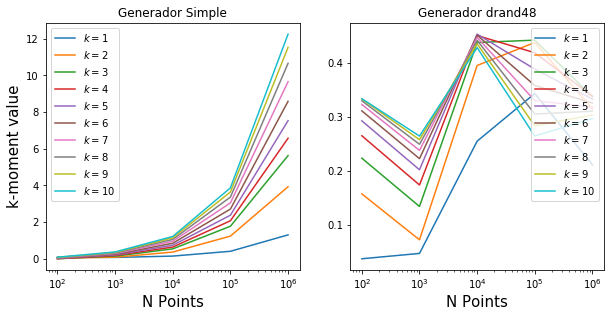

In [13]:
fig = plt.figure( figsize=(10,10) )

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

for i in range(NMoments):
    ax1.plot(Points,Moments1[i], label=r'$k=%.0f$' %(labelk[i]))
    ax2.plot(Points,Moments2[i], label=r'$k=%.0f$' %(labelk[i]))
    
ax1.set_title('Generador Simple')
ax1.set_xscale('log')
ax1.set_xlabel('N Points', fontsize=15)
ax1.set_ylabel('k-moment value', fontsize=15)

ax2.set_title('Generador drand48')
ax2.set_xscale('log')
ax2.set_xlabel('N Points', fontsize=15)

ax1.legend(loc=0)
ax2.legend(loc=1)

# Generacion de eventos usando numpy

In [14]:
x = np.random.rand()
print(x)

0.5626607581779894


In [15]:
matrix = np.random.rand(2,4)
print(matrix)

[[0.29147122 0.52265489 0.82685268 0.00690481]
 [0.96131125 0.87714352 0.19470215 0.16689202]]


In [16]:
U = np.random.uniform( -5,5, 10000 )
Pois = np.random.poisson(size=10000)
Normal = np.random.standard_normal(size = 10000)

(array([0.00051873, 0.0015562 , 0.00674352, 0.02100867, 0.05213263,
        0.10400589, 0.17870338, 0.26688793, 0.34962578, 0.39734918,
        0.3825653 , 0.32680154, 0.2339484 , 0.14576386, 0.0723632 ,
        0.03553318, 0.01400578, 0.0031124 , 0.00051873, 0.00051873]),
 array([-3.75672809, -3.37117299, -2.9856179 , -2.6000628 , -2.2145077 ,
        -1.8289526 , -1.44339751, -1.05784241, -0.67228731, -0.28673221,
         0.09882288,  0.48437798,  0.86993308,  1.25548818,  1.64104327,
         2.02659837,  2.41215347,  2.79770857,  3.18326367,  3.56881876,
         3.95437386]),
 <a list of 20 Patch objects>)

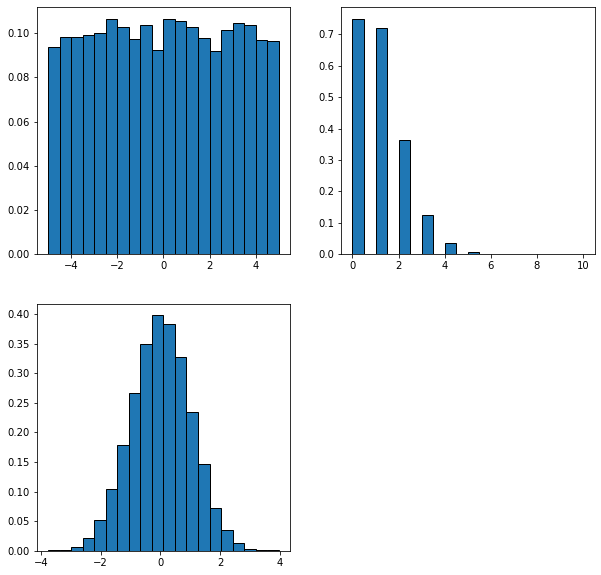

In [17]:
fig = plt.figure( figsize=(10,10) )

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.hist(U,bins=20,density=True,edgecolor='black')
ax2.hist(Pois,bins=20,density=True,edgecolor='black')
ax3.hist(Normal,bins=20,density=True,edgecolor='black')